<a href="https://colab.research.google.com/github/summethsusubros/COVID-19/blob/master/COVID_19_WORLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='poster',
        style='darkgrid',
        palette='bright',
        font='monospace',

        rc={'axes.facecolor':'k',
            'figure.facecolor':'k',
            'xtick.color': '.8',
            'ytick.color': '.8',
            'xtick.direction': 'out',
            'ytick.direction': 'out' ,
            'grid.color': '.15',
            'grid.linestyle': '-',
            'axes.labelcolor': 'y',
            'text.color': '.8',
            'xtick.bottom': True,
            'xtick.top': False,
            'ytick.left': True,
            'ytick.right': False,
           })


In [0]:
confrimed_dataset=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_dataset=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_dataset=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [0]:
dates=confrimed_dataset.keys()[4:]

In [0]:
confrimed_datewise=confrimed_dataset.iloc[:,4:]
death_datewise=death_dataset.iloc[:,4:]
recovered_datewise=recovered_dataset.iloc[:,4:]

In [0]:
total_cases=[]
total_death_datewise_list=[]
total_recovered_datewise_list=[]

total_active=[]
mortality_rate_datewise_list=[]
recovory_rate_datewise_list=[]
for date in dates:
  total_confirmed =confrimed_datewise[date].sum()
  total_death =death_datewise[date].sum()
  total_recovered =recovered_datewise[date].sum()

  total_cases.append(total_confirmed)
  total_death_datewise_list.append(total_death)
  total_recovered_datewise_list.append(total_recovered)
  total_active.append(total_confirmed-total_death-total_recovered)

  mortality_rate_datewise_list.append(total_death/total_confirmed)
  recovory_rate_datewise_list.append(total_recovered/total_confirmed)

def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 
world_daily_increase = daily_increase(total_cases)
world_daily_death = daily_increase(total_death_datewise_list)
world_daily_recovery = daily_increase(total_recovered_datewise_list)



In [0]:
from_day_one = np.array([i for i in range(len(dates))]).reshape(-1, 1)
total_cases = np.array(total_cases).reshape(-1, 1)
total_death_datewise_list = np.array(total_death_datewise_list).reshape(-1, 1)
total_recovered_datewise_list = np.array(total_recovered_datewise_list).reshape(-1, 1)


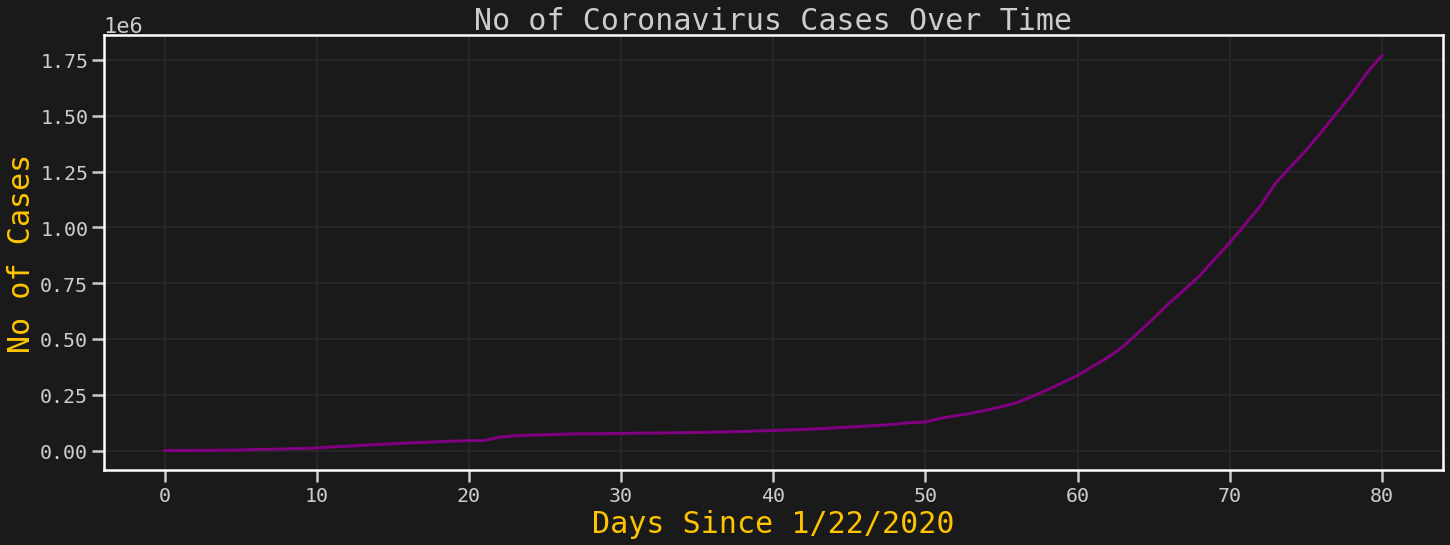

In [279]:
plt.figure(figsize=(24, 8))
plt.plot(from_day_one, total_cases,color='purple')
plt.title('No of Coronavirus Cases Over Time',size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


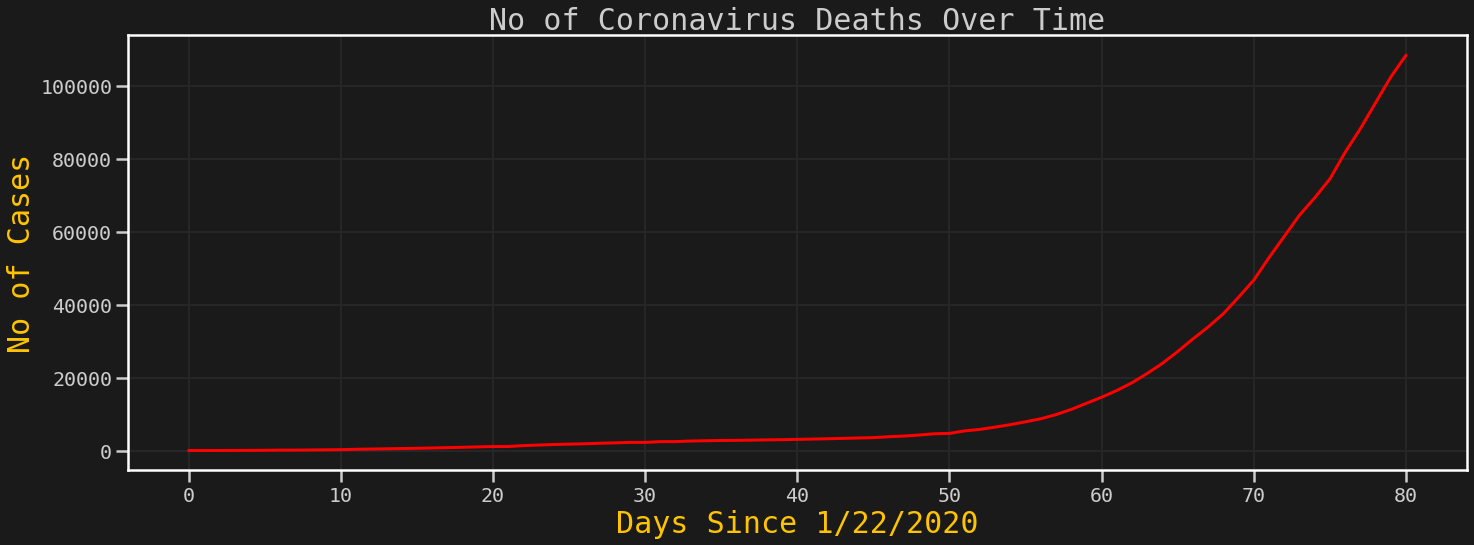

In [280]:
plt.figure(figsize=(24, 8))
plt.plot(from_day_one, total_death_datewise_list,color='red')
plt.title('No of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

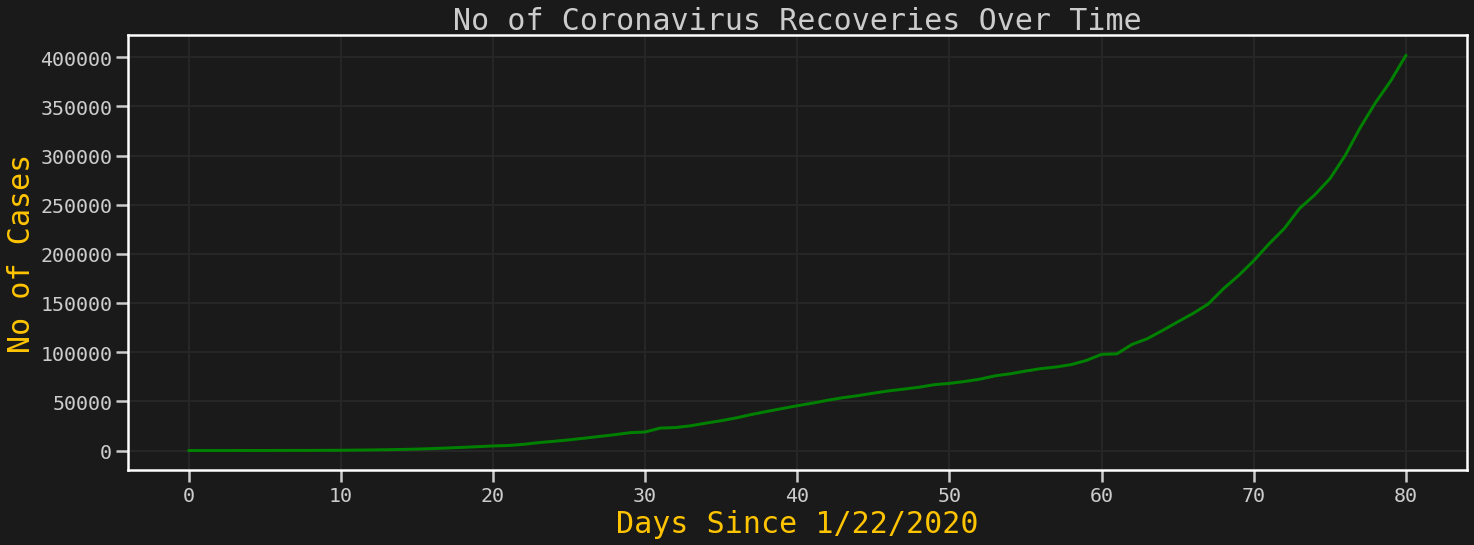

In [281]:
plt.figure(figsize=(24, 8))
plt.plot(from_day_one, total_recovered_datewise_list,color='green')
plt.title('No of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

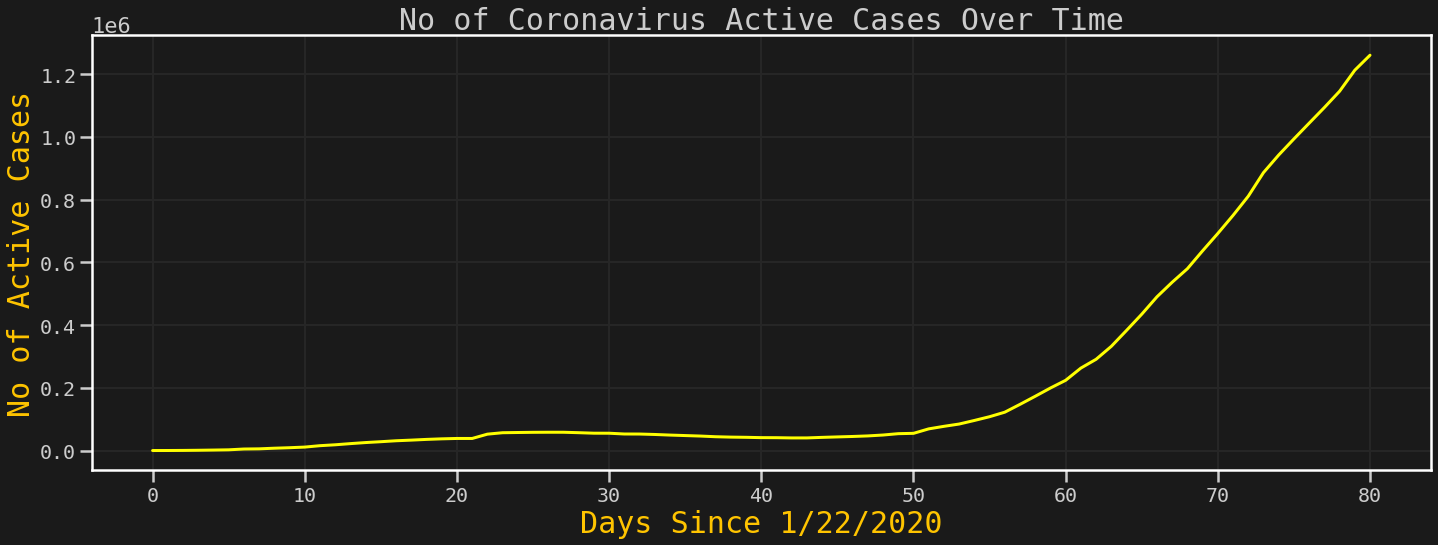

In [282]:
plt.figure(figsize=(24, 8))
plt.plot(from_day_one, total_active,color='yellow')
plt.title('No of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


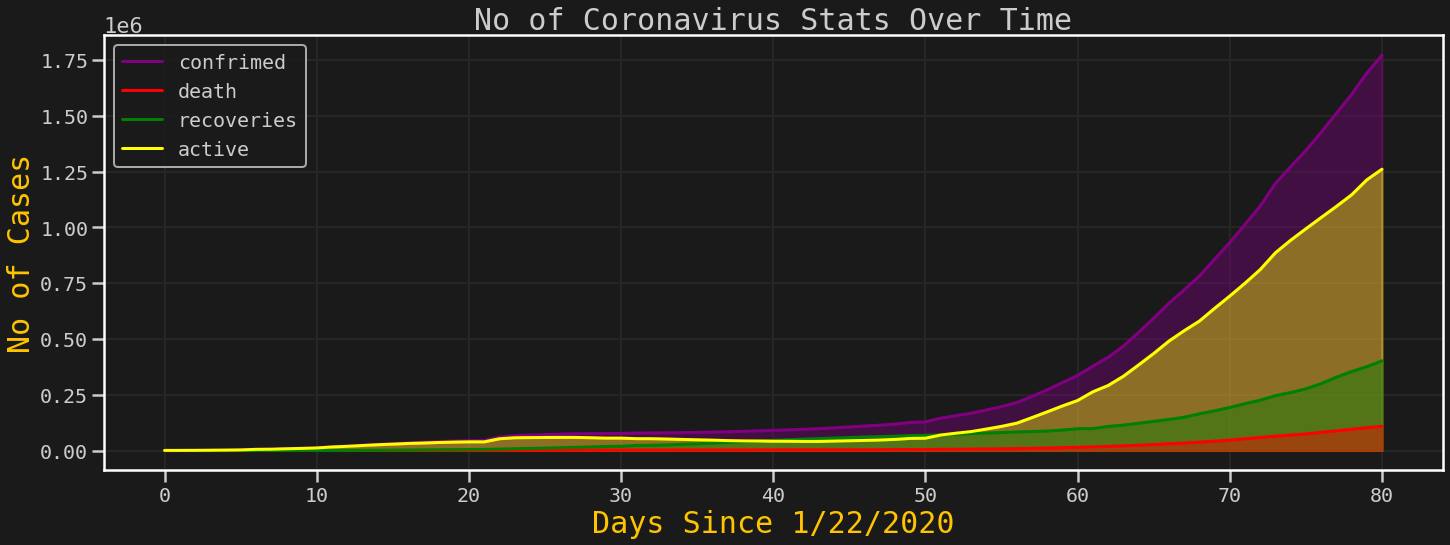

In [283]:
plt.figure(figsize=(24, 8))
plt.plot(from_day_one, total_cases,color='purple')
plt.plot(from_day_one, total_death_datewise_list,color='red')
plt.plot(from_day_one, total_recovered_datewise_list,color='green')
plt.plot(from_day_one, total_active,color='yellow')
plt.legend(['confrimed','death', 'recoveries','active'], loc='best', fontsize=20)
plt.title('No of Coronavirus Stats Over Time',size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.fill_between(np.arange(0, len(from_day_one)),0,total_cases.reshape(len(from_day_one),),color='purple',alpha=0.4)
plt.fill_between(np.arange(0, len(from_day_one)),0,total_active,color='yellow',alpha=0.4)
plt.fill_between(np.arange(0, len(from_day_one)),0,total_recovered_datewise_list.reshape(len(from_day_one),),color='green',alpha=0.4)
plt.fill_between(np.arange(0, len(from_day_one)),0,total_death_datewise_list.reshape(len(from_day_one),),color='red',alpha=0.4)
plt.show()

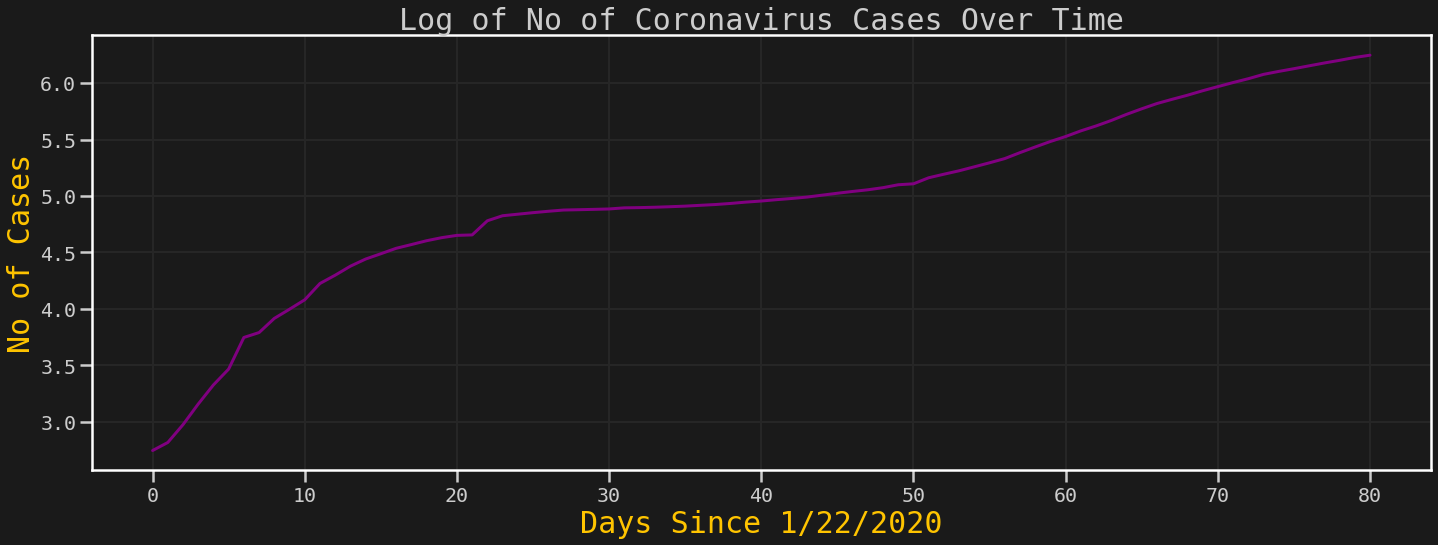

In [284]:
plt.figure(figsize=(24, 8))
plt.plot(from_day_one, np.log10(total_cases),color='purple')
plt.title('Log of No of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

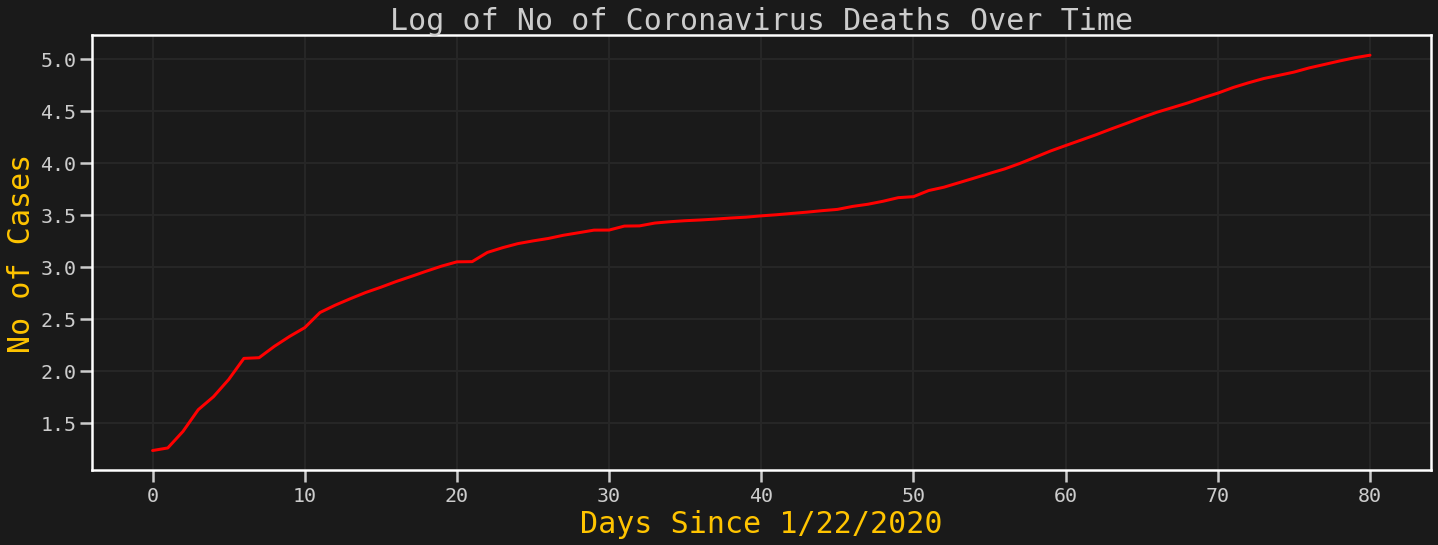

In [285]:
plt.figure(figsize=(24, 8))
plt.plot(from_day_one, np.log10(total_death_datewise_list),color='red')
plt.title('Log of No of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

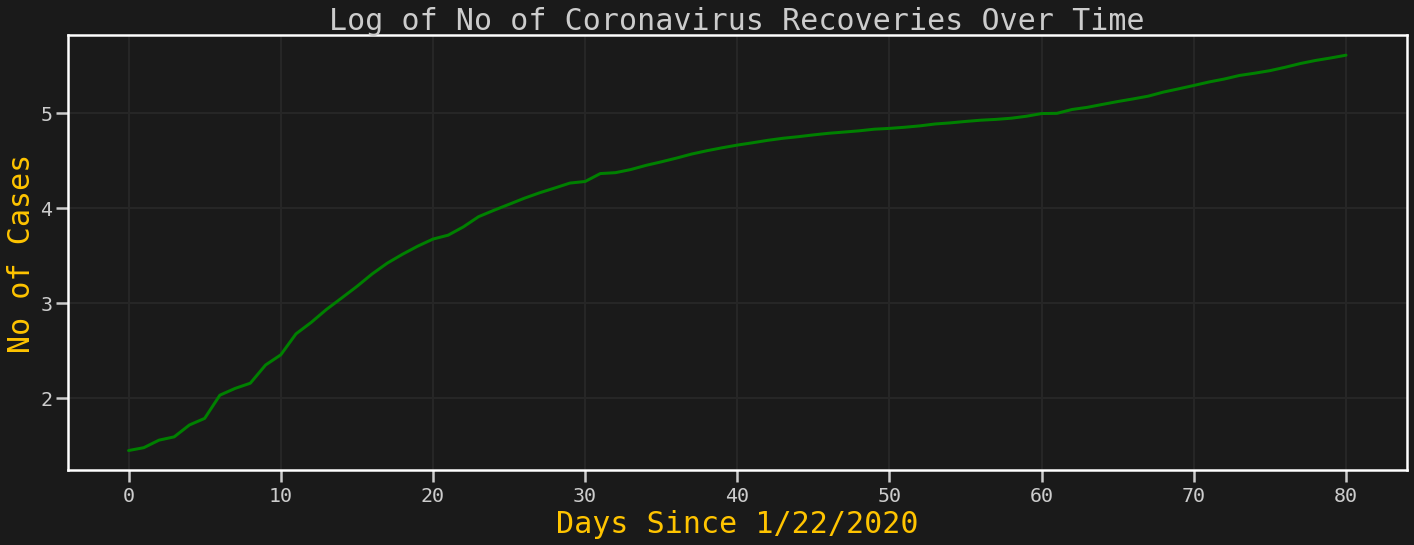

In [286]:
plt.figure(figsize=(24, 8))
plt.plot(from_day_one, np.log10(total_recovered_datewise_list),color='green')
plt.title('Log of No of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

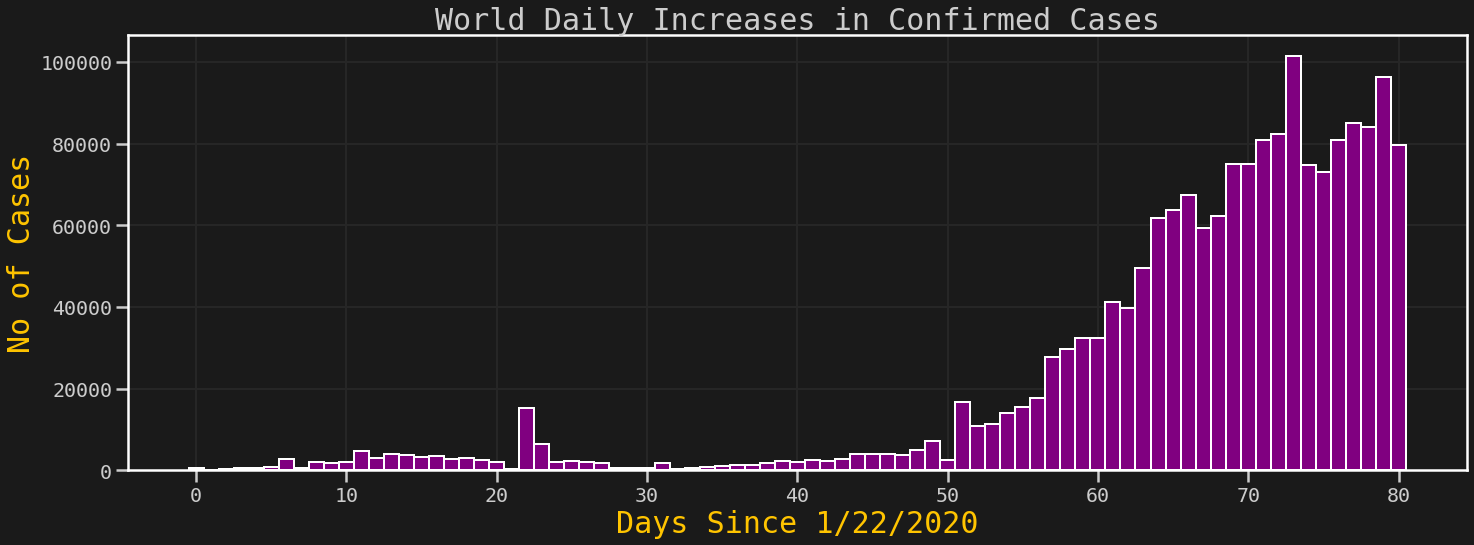

In [287]:
plt.figure(figsize=(24, 8))
plt.bar(range(len(from_day_one)),world_daily_increase,width=1,color='purple')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

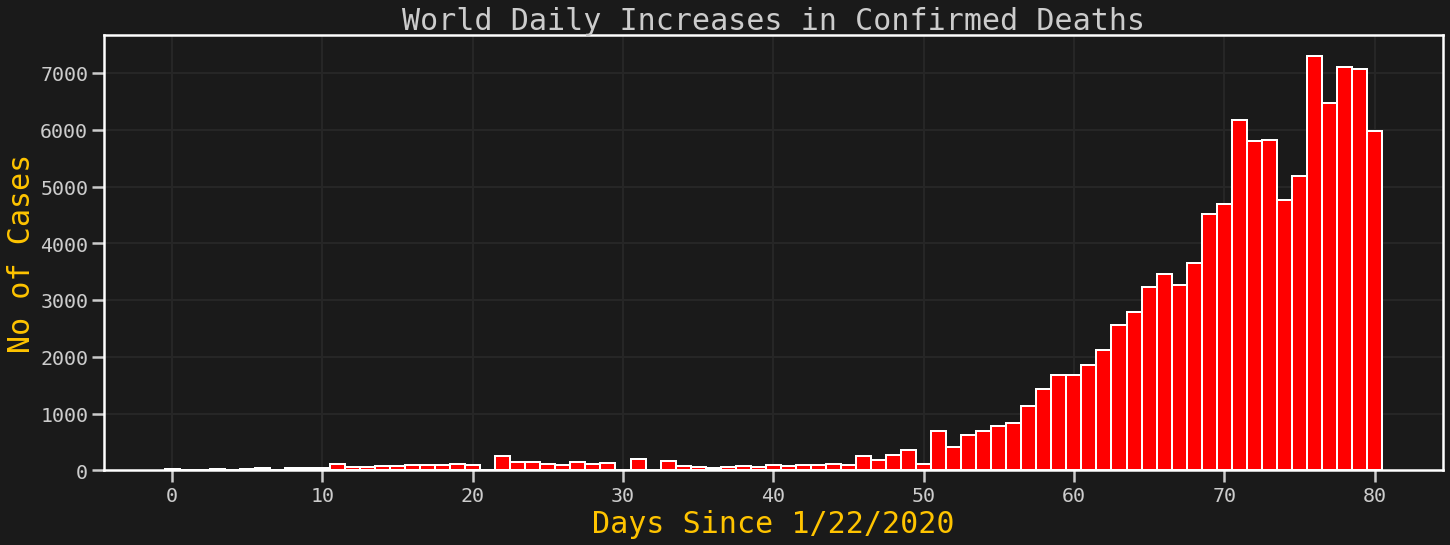

In [288]:
plt.figure(figsize=(24, 8))
plt.bar(range(len(from_day_one)), world_daily_death,width=1,color='red')
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

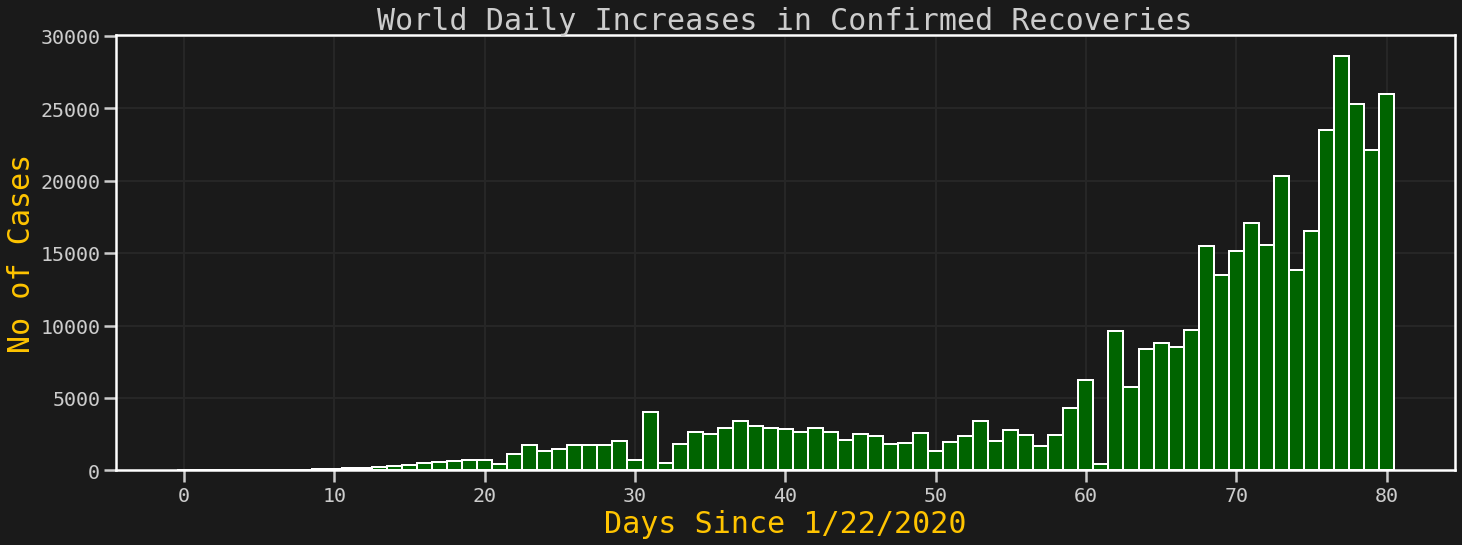

In [289]:
plt.figure(figsize=(24, 8))
plt.bar(range(len(from_day_one)), world_daily_recovery,width=1,color='darkgreen')
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

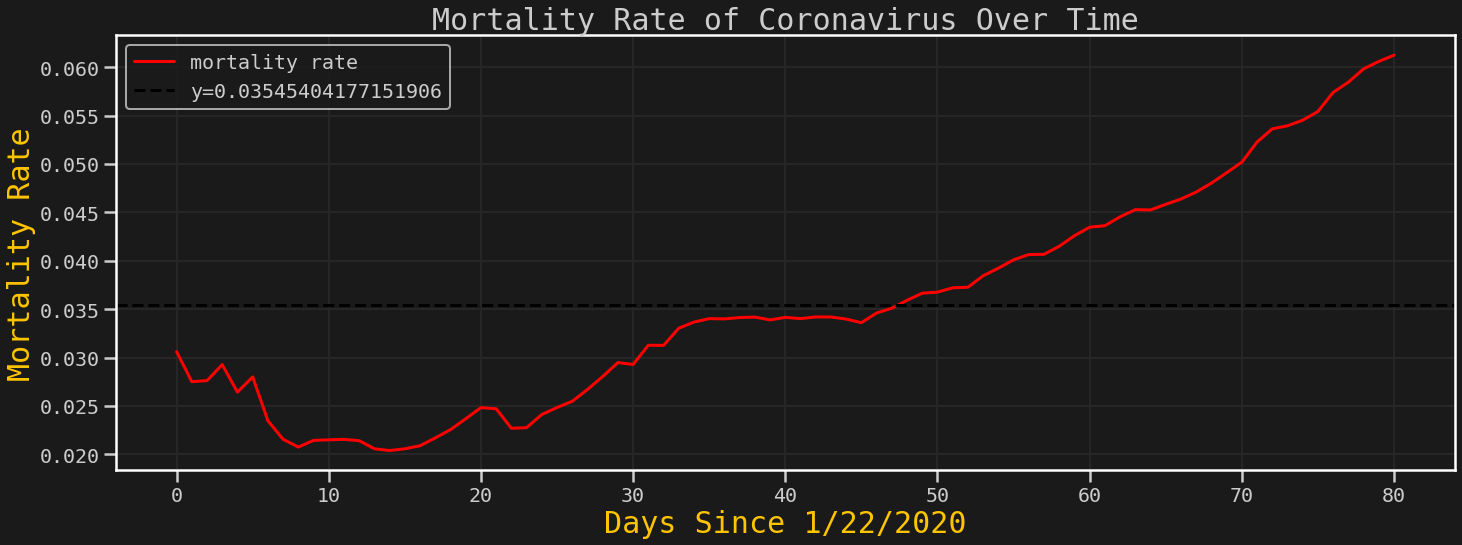

In [290]:
mean_mortality_rate = np.mean(mortality_rate_datewise_list)
plt.figure(figsize=(24, 8))
plt.plot(from_day_one, mortality_rate_datewise_list, color='red')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

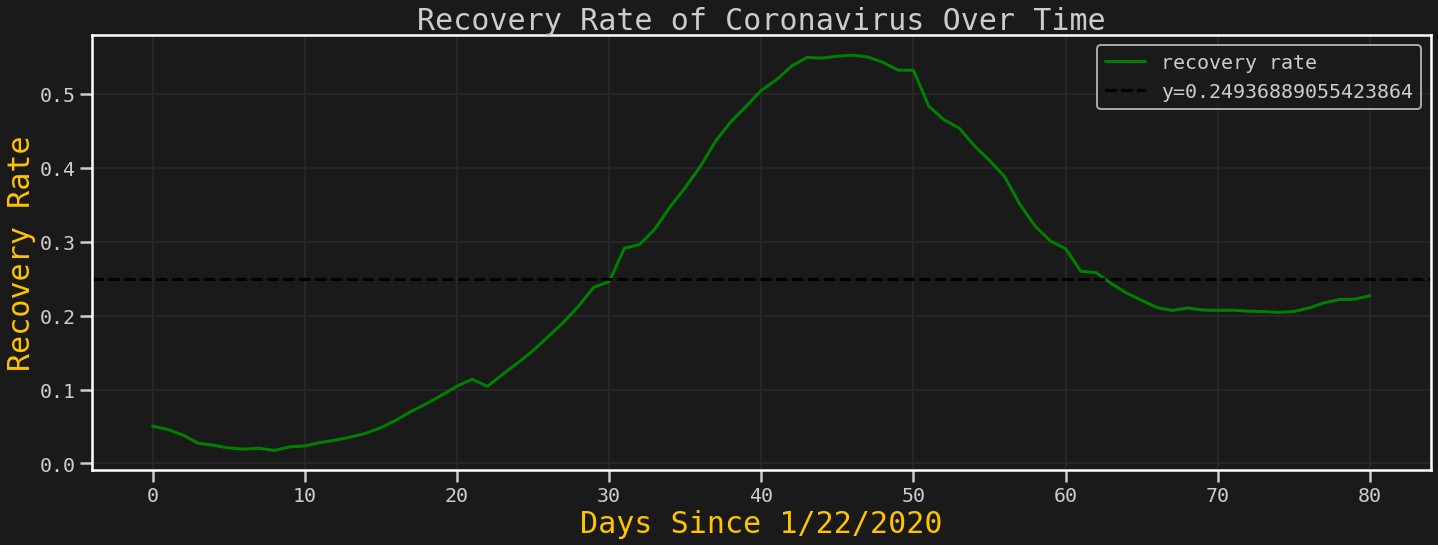

In [291]:
mean_recovery_rate = np.mean(recovory_rate_datewise_list)
plt.figure(figsize=(24, 8))
plt.plot(from_day_one, recovory_rate_datewise_list, color='green')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

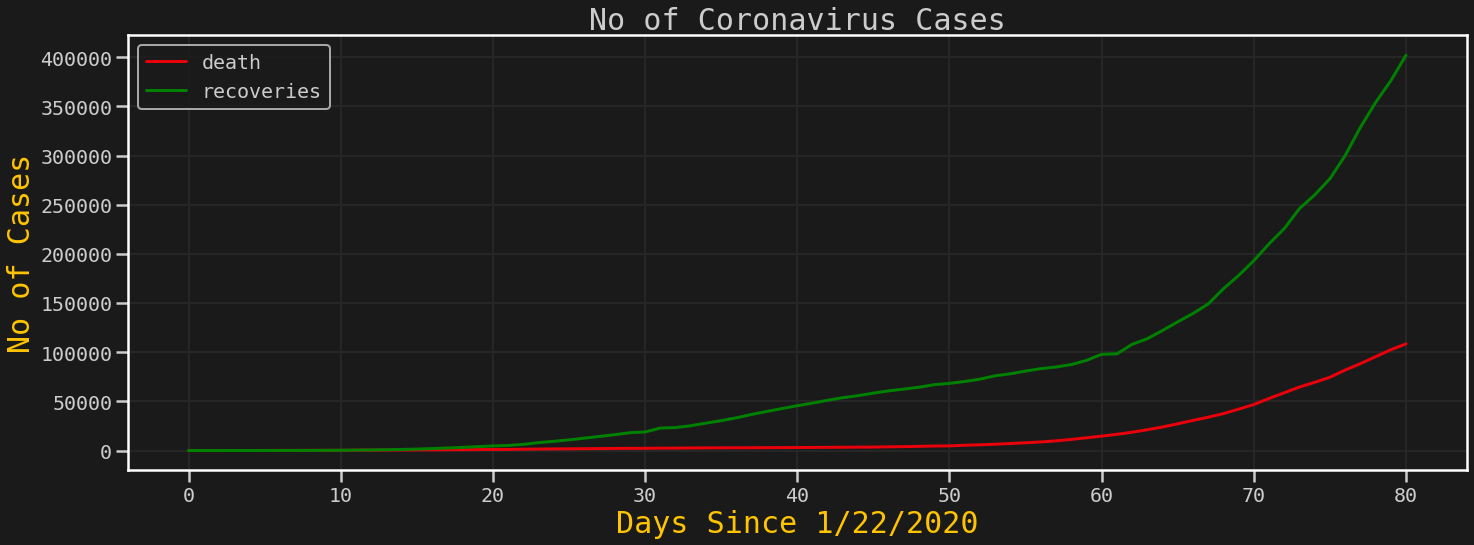

In [292]:
plt.figure(figsize=(24, 8))
plt.plot(from_day_one, total_death_datewise_list, color='r')
plt.plot(from_day_one, total_recovered_datewise_list, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('No of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()